<a href="https://colab.research.google.com/github/hyunku/MNIST-study/blob/main/MNIST_CNN_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강남대학교 데이터사이언스 학술동아리 데이터 세상 활동자료 - made by 강현구

# 스터디 계획표

### 1주차  -> Introduction, 인공신경망 딥러닝 굵직한 알고리즘(MLP, LSTM, GRU, Conv1D, Conv2D) 과 데이터 별 차원 소개 및 기본적인 딥러닝 알고리즘 MLP 동작원리 및 사용해보기 -> 9/28 10시

### 2주차 -> 3차원 데이터 시계열 데이터 모델 (LSTM, GRU) 사용해보기, MLP 사용해보기 -> 10/5 9시

### 3주차 -> CNN 기본 원리 - 합성곱 신경망(Conv2D), 풀링, stride 등등 

### 4주차 -> CNN 심화 및 본 코드의 모델 예제로 이해

### 5주차 -> concatenate layer를 사용한 복잡한 모델 구현 및 batchnormalization 등 CNN 심화 - conv1D

### 6주차 -> 마무리, 복습 및 다음 단계 소개 : 커스텀 데이터셋으로 이미지 분류, object dectection


#### https://github.com/hyunku/k-project/blob/main/modeling/final_model_module.ipynb 여러 모델 구현해놓음. <br>
 모델에 관심 생기면 참고해보면 좋을듯

# 1주차 내용

Time Seris 데이터의 경우 LSTM, GRU, Conv1D 등등 인풋을 (batch(=raw), sequence, column) 으로 시간축 데이터를 생성해준 다음 3차원 데이터를 인풋으로 사용해주면 효과적임.

Image 데이터의 경우 Conv2D + 여러가지 기술들로 (batch, height(세로), width(가로), channel) 4차원 인풋으로 사용.

## 데이터들의 여러 차원 소개

흑백사진 1장, 데이터프레임 : 2차원 <br>
흑백사진 여러장 : 3차원 (batch, height, width) <br>
time series data : 3차원 (batch, sequence, col) -> 그냥 2차원으로 사용 많이 하지만 3차원으로 바꿔주는 것이 딥러닝에서 더욱 효과적임<br>
컬러사진 1장 : 3차원 (height, width, channel)
컬러사진 여러장 : 4차원 (batch, height, width, channel)


## 영상처리의 분야들

1. 이미지 복원(분광처리, 양자화) - 원본 이미지 화질 떨어질 시 Sampling(픽셀나눔) & Quantyfing(양자화) 로 이미지 화질 upgrade 
-> 관심있으면 가상현실 전공 배성근 교수님 영상처리 수업 들어볼것.
2. 이미지 분류 - 학습시 인풋으로 사진, 타겟으로  label 사용
3. 객체 검출 - 학습시 인풋으로 사진 내 객체의 좌표들, 타겟으로 사진 내 객체들의 label. 보통 annotation 파일 json형식으로 따로 주어짐.

##### MLP 구조

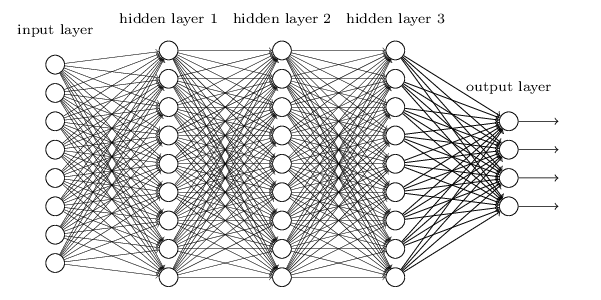

# 2주차

## MLP, LSTM, GRU 실습예제

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Input, LSTM, GRU
import random

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
data = np.loadtxt('/content/data/ThoraricSurgery3.csv', delimiter=",")
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [4]:
X_train = data.iloc[:400,:16]
X_test = data.iloc[400:,:16]
Y_train = data.iloc[:400,16]
Y_test = data.iloc[400:,16]

print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (400, 16)       X_test: (70, 16)
Y_train: (400,)       Y_test: (70,)


### MLP 모델

In [5]:
input_tensor = Input(shape=(X_train.shape[1])) # 16
x = Dense(128, activation='relu')(input_tensor) # 128
x = Dense(100, activation='relu')(x) # 100
output = Dense(1, activation='relu')(x) # 1
model = Model(inputs=input_tensor, outputs=output)
model.summary()
# Fully-connect layer의 param 계산 : (input속성 수 * output 뉴런 수) + output 뉴런 수(bias)
# 뉴런 개수마다 편향 1개씩 생김.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,177
Trainable params: 15,177
Non-trainable params: 0
_________________________________________________________________


tip : 회귀모델일 경우 출력층 노드 수를 1로 만들어주기. 분류모델일 경우 출력층 노드 개수를 분류 label 개수만큼.

In [ ]:
# 모델 학습
model.compile(loss = "mean_squared_error",optimizer = "adam", metrics=["acc"])
hist = model.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1) #모델 피팅
# batch_size : 몇개 묶음으로 인풋을 넣을 건지 ( 한 epoch를 쪼개는 개념)
# epochs : 총 학습을 몇회 진행할지
# verbose : 0,1 존재 -> 0:학습과정 안보여줌 1: 학습과정 보여줌

Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 0.6168 - acc: 0.8150
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - acc: 0.8450


손실함수 종류 (loss 파라미터) <br><br>
mean_squared_error : 선형회귀 단순 실제-예측값 (회귀모형에 사용) <br><br>
crossentropy 계열 손실함수 - 분류모형에 사용 <br><br>
binary_crossentropy : ~인지 아닌지 ( 이진분류 ) <br>
categorical_crossentropy : 3개 이상 다중분류 + input data 가 one-hot encoding 된 경우 <br>
sparse_categorical_crossentropy : 3개 이상 다중분류 + input data 가 one-hot encoding되어있지 않은 raw 상태인 경우<br>

최적화함수 : 손실함수를 어떤 규칙을 가지고 역전파 학습을 진행할지 결정하는 함수.<br>
-> 간단하게 손실함수를 얼만큼의 보폭, 방향을 한 스텝으로 결정해서 학습할지 결정. 

최적화함수 종류 (optimizer 파라미터) <br>

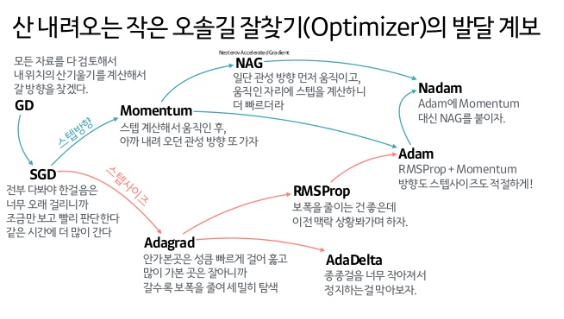

## LSTM & GRU 소개

LSTM<br><br>
인과관계를 장시간까지 확장<br>
RNN + Cell state(장기기억) 구조<br>
은닉층 -> 블럭으로 대체. 각 블럭은 은닉층에 장기기억이 추가된 네트워크 구조<br>
-> 특징 : 장기기억(cell state), 단기기억(hidden state) 존재.

LSTM

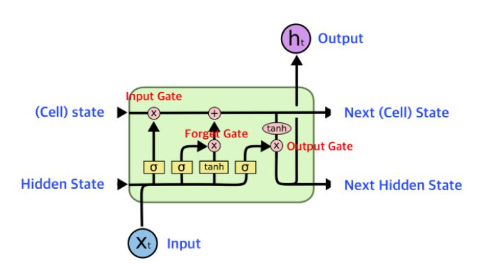

GRU<br>
LSTM 보다 간결함 -> 더 빠름<br>
lstm 의 장기기억, 단기기억을 합쳐서 하나의 단기기억으로 사용.<br>

GRU

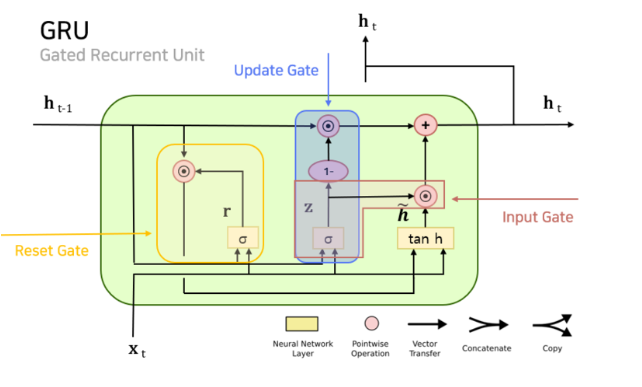

### LSTM, GRU 모델링

2차원 데이터 -> 시간정보를 담은 3차원 데이터로 변환

In [ ]:
#차분을 정해서 얼마만큼의 차분으로 데이터를 사용해서 차분데이터를 추출하고, 기존데이터와 차분된 데이터를 함께 사용하여 다음 시간대의 데이터를 추출하는 작업. 즉 시간정보가 적용된 새로운 X,Y데이터로 분리
sequence = 3 #몇개의 입력데이터로 차분 데이터 생성할지에 대한 파라미터. 지금은 3라고 가정. 나중에 반복문을 통해 sequence 최적화가 필요할듯.
X_train_new, Y_train_new = [], []
for index in range(len(X_train) - sequence): #sequence개의 데이터만큼 차분데이터 분석에 사용하므로, 총 데이터 개수 - sequence개수가 전체 데이터의 길이 --> 총길이만큼 돌리는 것이므로, 기존 차원을 뜻하는 (row, column) 꼴에는 변함 없음 --> 2차원 데이터
  X_train_new.append(np.array(X_train[index:index + sequence])) #X_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> sequence를 뜻하는 차원 생성
  Y_train_new.append(np.ravel(Y_train[index + sequence:index + sequence + 1])) #Y_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> 그러나 ravel() 로 차원축소 --> sequence차원 생성되지 않음.
X_train, Y_train = np.array(X_train_new), np.array(Y_train_new) #array로 저장되어있는 리스트를 array로 변환해서 저장

In [ ]:
X_test_new, Y_test_new = [], [] #동일한 과정 test데이터셋에도 적용
for index in range(len(X_test) - sequence):
  X_test_new.append(np.array(X_test[index:index + sequence])) 
  Y_test_new.append(np.ravel(Y_test[index + sequence:index + sequence + 1]))
X_test, Y_test = np.array(X_test_new), np.array(Y_test_new)

In [ ]:
print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (397, 3, 16)       X_test: (67, 3, 16)
Y_train: (397, 1)       Y_test: (67, 1)


In [ ]:
input_tensor = Input(shape=(X_train.shape[1], X_train.shape[2])) # 3 * 16
x = LSTM(128, return_sequences=True, dropout=0.2, activation='relu')(input_tensor) # 3 * 128
x = LSTM(256, return_sequences=True, dropout=0.2, activation='relu')(x) # 3 * 256
x = LSTM(64, return_sequences=False, dropout=0.2, activation='relu')(x) # 64
output = Dense(1)(x) # 1
model = Model(inputs=input_tensor, outputs=output)
model.summary()
# lstm(128) : lstm연산 후 output 뉴런수
# return_sequences : 시간회귀 : 은닉층에서는 True로 둬서 시간 정보 살리고, 블록의 마지막 층에서는 False로 둬서 시간정보 없애주기 
# dropout : 과적합 방지용. 데이터 버릴 확률

# LSTM param 계산 : {(input속성수 * output 뉴런수) + (output 뉴런수 * output 뉴런수) + output 뉴런 수} * 4
# {(입력 가중치) + (은닉 가중치) + 편향 수} * gate 개수 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3, 16)]           0         
                                                                 
 lstm (LSTM)                 (None, 3, 128)            74240     
                                                                 
 lstm_1 (LSTM)               (None, 3, 256)            394240    
                                                                 
 lstm_2 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 550,721
Trainable params: 550,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input_tensor = Input(shape=(X_train.shape[1], X_train.shape[2])) # 3 * 16
x = GRU(128, return_sequences=True, dropout=0.2, activation='relu')(input_tensor) # 3 * 128
x = GRU(256, return_sequences=True, dropout=0.2, activation='relu')(x) # 3 * 256
x = GRU(64, return_sequences=False, dropout=0.2, activation='relu')(x) # 64
output = Dense(1)(x) # 1
model = Model(inputs=input_tensor, outputs=output)
model.summary()

# GRU param 계산 : {(input속성수 * output 뉴런수) + (output 뉴런수 * output 뉴런수) + output 뉴런 수} * 3 + (output 뉴런수 * 3)
# {(입력 가중치) + (은닉 가중치) + 편향 수} * gate 개수 + (편향 수 * gate 개수)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3, 16)]           0         
                                                                 
 gru (GRU)                   (None, 3, 128)            56064     
                                                                 
 gru_1 (GRU)                 (None, 3, 256)            296448    
                                                                 
 gru_2 (GRU)                 (None, 64)                61824     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 414,401
Trainable params: 414,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 학습
model.compile(loss = "mean_squared_error",optimizer = "adam", metrics=["acc"])
hist = model.fit(X_train, Y_train, batch_size=10, epochs=10, verbose=1) #모델 피팅

Epoch 1/10
40/40 [==============================] - 5s 17ms/step - loss: 0.2019 - acc: 0.8010
Epoch 2/10
40/40 [==============================] - 1s 23ms/step - loss: 0.1459 - acc: 0.8438
Epoch 3/10
40/40 [==============================] - 1s 21ms/step - loss: 0.1381 - acc: 0.8438
Epoch 4/10
40/40 [==============================] - 1s 19ms/step - loss: 0.1407 - acc: 0.8438
Epoch 5/10
40/40 [==============================] - 1s 35ms/step - loss: 0.1346 - acc: 0.8438
Epoch 6/10
40/40 [==============================] - 1s 24ms/step - loss: 0.1355 - acc: 0.8438
Epoch 7/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1375 - acc: 0.8438
Epoch 8/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1321 - acc: 0.8438
Epoch 9/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1345 - acc: 0.8438
Epoch 10/10
40/40 [==============================] - 1s 16ms/step - loss: 0.1320 - acc: 0.8438


# 3주차

CNN 개념은 패드나 그림판으로 설명할 예정. <br><br>
1. convolution 연산<br>
2. stride<br>
3. kernel<br>
4. filter<br>
5. padding<br>
6. activation

In [ ]:
# 원본 데이터 형태 확인
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (60000, 28, 28)       X_test: (10000, 28, 28)
Y_train: (60000,)       Y_test: (10000,)


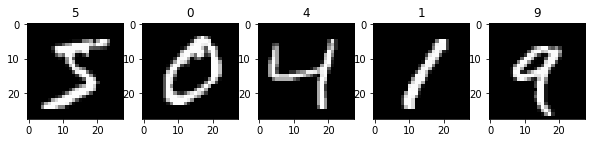

In [ ]:
# 보고싶은 데이터
show_img = X_train[:5,:,:]
show_label = Y_train[:5]

fig, axs = plt.subplots(figsize=(10,10), nrows=1, ncols=5) # 그림들 (1,5) 꼴로 보고 싶음
for i in range(5):
  axs[i].imshow(show_img[i], cmap='gray')
  axs[i].set_title(show_label[i])

In [ ]:
# 4차원 데이터로 만들어주기 (CNN 인풋 형태)
X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.
# one-hot encoding 형태로 바꿔줌 -> 나중에 compile 할때 categorical_crossentropy 사용
# 목표변수를 one-hot encoding 하지 않았다면 추후에 compile할때 sparse_categorical_crossentropy 사용
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 형태 바꿔준 후 모양 확인
print(f'X_train: {X_train.shape}       X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}       Y_test: {Y_test.shape}')

X_train: (60000, 28, 28, 1)       X_test: (10000, 28, 28, 1)
Y_train: (60000, 10)       Y_test: (10000, 10)


In [ ]:
# CNN 모델 만들기
input_tensor = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])) # 28 * 28 * 1
x = Conv2D(32,(3,3),1,padding='same',activation='relu')(input_tensor) # 28 * 28 * 32
x = Conv2D(64,(3,3),activation='relu')(x) # 26 * 26 * 64
x = MaxPooling2D(2)(x) # 13 * 13 * 64
x = Flatten()(x) # 10816
x = Dense(100, activation='relu')(x) # 100
output = Dense(10, activation='softmax')(x) # 10
model = Model(inputs=input_tensor, outputs=output)

In [ ]:
# 모델 요약
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               1081700   
                                                           

In [ ]:
# 모델 학습
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
hist = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 179s 761ms/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 2/30
235/235 [==============================] - 193s 819ms/step - loss: 0.0134 - acc: 0.9963 - val_loss: 0.0403 - val_acc: 0.9872
Epoch 3/30
235/235 [==============================] - 167s 712ms/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0385 - val_acc: 0.9889
Epoch 4/30
235/235 [==============================] - 165s 703ms/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 5/30
235/235 [==============================] - 160s 683ms/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0422 - val_acc: 0.9898
Epoch 6/30
235/235 [==============================] - 171s 727ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0422 - val_acc: 0.9890
Epoch 7/30
235/235 [==============================] - 155s 660ms/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0423 - val_acc: 0.9901
Epoch 8/30
235/235 [============================

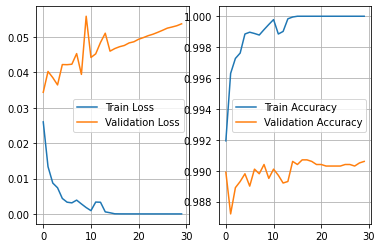

In [ ]:
# 학습 결과 보기
loss = hist.history["loss"] # train 셋의 손실
acc = hist.history["acc"] # train 셋의 정확도
val_loss = hist.history["val_loss"] # 검증셋의 손실
val_acc = hist.history["val_acc"] # 검증셋의 정확도

# 모델 학습 결과 성능 시각화
plt.subplot(1,2,1) 
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

In [ ]:
X_test.shape

(10000, 28, 28, 1)

(10000, 28, 28)
Actual : 2	Predict : 2


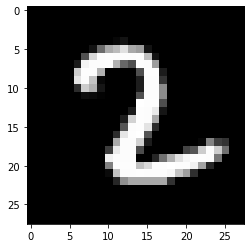

In [ ]:
# 랜덤하게 하나 숫자 뽑아서 잘 예측했는지 확인하기

X_test_watch = X_test[:,:,:,0] # 흑백사진 시각화 시에는 1차원 없어야함 -> 1차원 있던거 없애주기
print(X_test_watch.shape)

index = random.randint(0,len(X_test))
plt.imshow(X_test_watch[index],cmap="gray")
predict = model.predict(X_test[index].reshape(1,28,28,1)) # 모델을 사용하여 예측 -> 예측할때는 4차원 데이터 필요. 1개데이터 사용하므로 맨 앞 1 명시(-1 써도됌 : auto-detect)
print("Actual : {}\tPredict : {}".format(np.argmax(Y_test[index]),np.argmax(predict)),)

In [ ]:
# test 셋에서 틀린 데이터 개수 확인
wrong_index_list=[]
predict = model.predict(X_test)
for index in range(len(X_test)):
    if np.argmax(Y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

[18, 115, 151, 247, 321, 340, 445, 582, 659, 674, 882, 883, 924, 938, 1014, 1039, 1112, 1226, 1232, 1242, 1247, 1260, 1319, 1393, 1414, 1522, 1530, 1549, 1709, 1717, 1878, 1901, 2035, 2040, 2070, 2118, 2129, 2130, 2293, 2462, 2582, 2597, 2654, 2770, 2896, 2921, 2927, 2939, 3225, 3503, 3520, 3558, 3559, 3727, 3762, 3808, 3853, 4078, 4176, 4199, 4201, 4360, 4571, 4740, 4761, 4807, 4823, 5331, 5457, 5654, 5749, 5937, 5955, 5982, 6091, 6576, 6597, 6625, 7216, 8325, 8408, 8527, 9009, 9015, 9019, 9024, 9620, 9638, 9642, 9664, 9692, 9729, 9770, 9839]
총 틀린 갯수 :  94


Actual : 7	Predict : 0


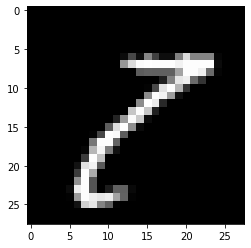

In [ ]:
# 틀린 것들 랜덤하게 보여주기
X_test_watch = X_test[:,:,:,0] 

new_index = random.choice(wrong_index_list)
plt.imshow(X_test_watch[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(Y_test[new_index]),np.argmax(new_index)),)